# Hand Gesture Recognition

In [1]:
from utilities import *

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load data

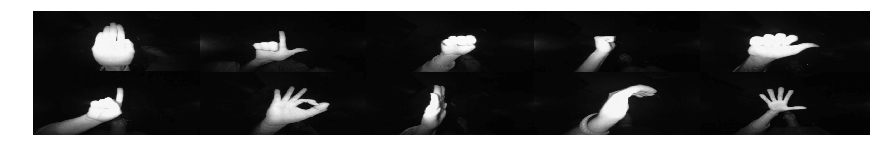

In [2]:
data, labels = load()

In [3]:
print('Total number of images: ', data.shape[0])
print('Image size: ', data.shape[1], 'x', data.shape[1])

Total number of images:  40000
Image size:  120 x 120


### Shuffle and separate into train and test

In [4]:
train_prct = 0.80
val_prct = 0.10
test_prct = 0.10
data, labels, train_data, train_labels, \
val_data, val_labels, test_data, test_labels = train_test_split(data, labels, train_prct, val_prct, test_prct)

In [5]:
print('Number of training images: ', train_data.shape[0])
print('Number of testing images: ', test_data.shape[0])
print('Number of validation images: ', val_data.shape[0])

Number of training images:  32000
Number of testing images:  4000
Number of validation images:  4000


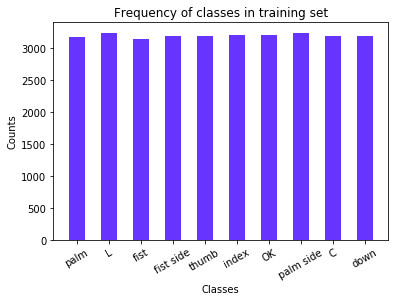

In [6]:
plot_label_counts(train_labels)

### One-hot label encoding

In [7]:
train_labels_onehot, val_labels_onehot, test_labels_onehot \
= one_hot_encoder(train_labels, val_labels, test_labels)

### Architecture

In [8]:
#parameters
batch_size = 64
epochs = 25
num_classes = 10

In [9]:
my_CNN = CNN()
my_CNN.compile(loss='categorical_crossentropy',  optimizer = RMSprop(), metrics=['accuracy',\
                                top_2_accuracy, top_3_accuracy])

In [10]:
my_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 128)     1280      
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 120, 120, 128)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 60, 60, 64)        0         
__________

### Train

In [11]:
my_CNN_train = my_CNN.fit(train_data, train_labels_onehot, batch_size=batch_size,epochs=epochs,\
                                    verbose=1,validation_data=(val_data, val_labels_onehot))

Train on 32000 samples, validate on 4000 samples
Epoch 1/25
32000/32000 [==============================] - 74s 2ms/step - loss: 0.4814 - acc: 0.8610 - top_2_accuracy: 0.9232 - top_3_accuracy: 0.9477 - val_loss: 0.0334 - val_acc: 0.9912 - val_top_2_accuracy: 0.9968 - val_top_3_accuracy: 0.9985
Epoch 2/25
32000/32000 [==============================] - 71s 2ms/step - loss: 0.0611 - acc: 0.9837 - top_2_accuracy: 0.9974 - top_3_accuracy: 0.9992 - val_loss: 0.0811 - val_acc: 0.9832 - val_top_2_accuracy: 0.9982 - val_top_3_accuracy: 0.9988
Epoch 3/25
32000/32000 [==============================] - 70s 2ms/step - loss: 0.0422 - acc: 0.9896 - top_2_accuracy: 0.9982 - top_3_accuracy: 0.9993 - val_loss: 0.7727 - val_acc: 0.9255 - val_top_2_accuracy: 0.9677 - val_top_3_accuracy: 0.9790
Epoch 4/25
32000/32000 [==============================] - 71s 2ms/step - loss: 0.0280 - acc: 0.9937 - top_2_accuracy: 0.9992 - top_3_accuracy: 0.9997 - val_loss: 2.3078 - val_acc: 0.7897 - val_top_2_accuracy: 0.9075 

In [13]:
#my_CNN.save('my_CNN.h5')

### Training results

<Figure size 720x720 with 0 Axes>

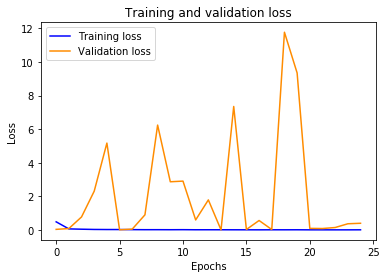

In [12]:
show_training(my_CNN_train, epochs)

### Visualize layers

Text(0.5,1,'Image from class 3')

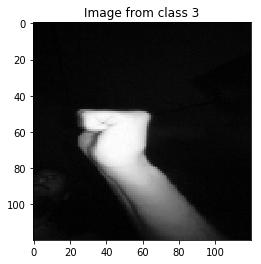

In [14]:
layer_outputs = [layer.output for layer in my_CNN.layers]
activation_model = Model(inputs=my_CNN.input, outputs=layer_outputs)

img = 0
activations = activation_model.predict(train_data[img].reshape(1,120,120,1))
plt.imshow(train_data[img][:,:,0], cmap='gray');
plt.title('Image from class ' + str(train_labels[img]))

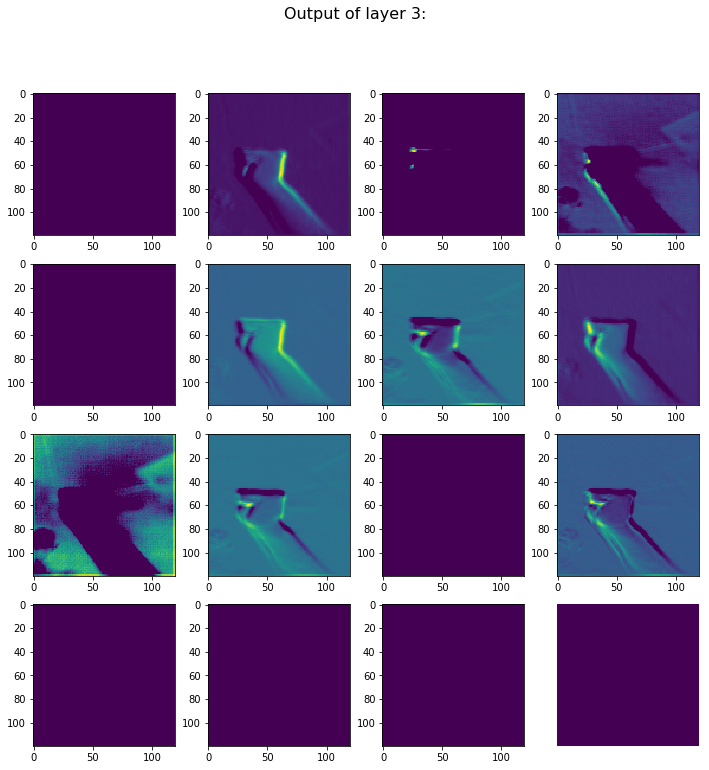

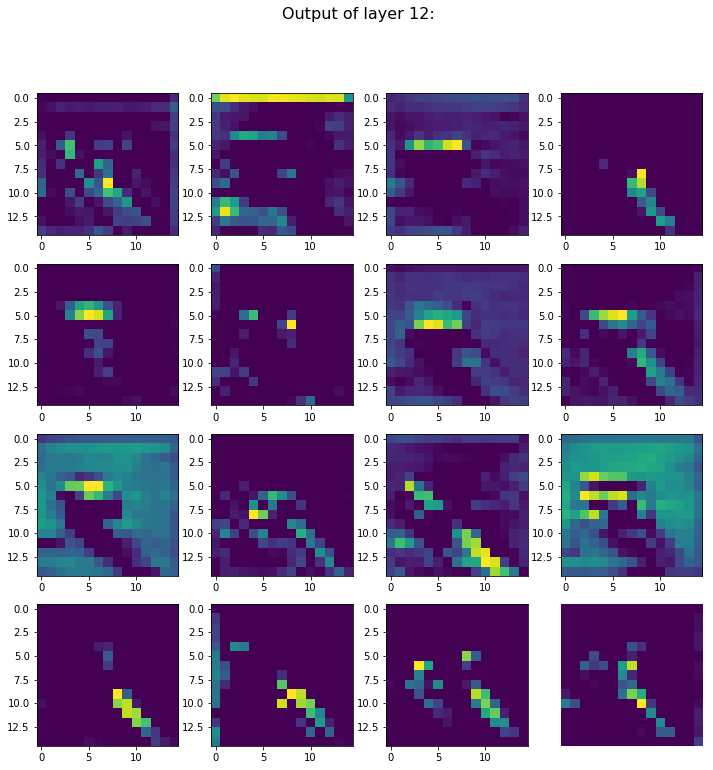

In [15]:
display_activation(activations, 4, 4, 3) #display 25 channels across layer 3
display_activation(activations, 4, 4, 12) #display 25 channels across layer 12

### Evaluate on test set

In [16]:
loss, acc, top2, top3 = my_CNN.evaluate(test_data, test_labels_onehot, batch_size=batch_size, verbose=0)

In [17]:
print('Test loss:', loss)
print('Test accuracy:', acc)
print('Top 2 accuracy:', top2)
print('Top 3 accuracy:', top3)

Test loss: 1.21636002500786
Test accuracy: 0.902
Top 2 accuracy: 0.977
Top 3 accuracy: 0.997


### Predict using test set

In [18]:
prediction = my_CNN.predict(test_data)

In [19]:
predicted = prediction.argmax(axis=1)
print('predicted:', predicted)
print('ground truth:',(test_labels))

predicted: [2 0 0 ... 1 4 1]
ground truth: [5 0 0 ... 1 4 1]


### Results

Found 3608 correct labels


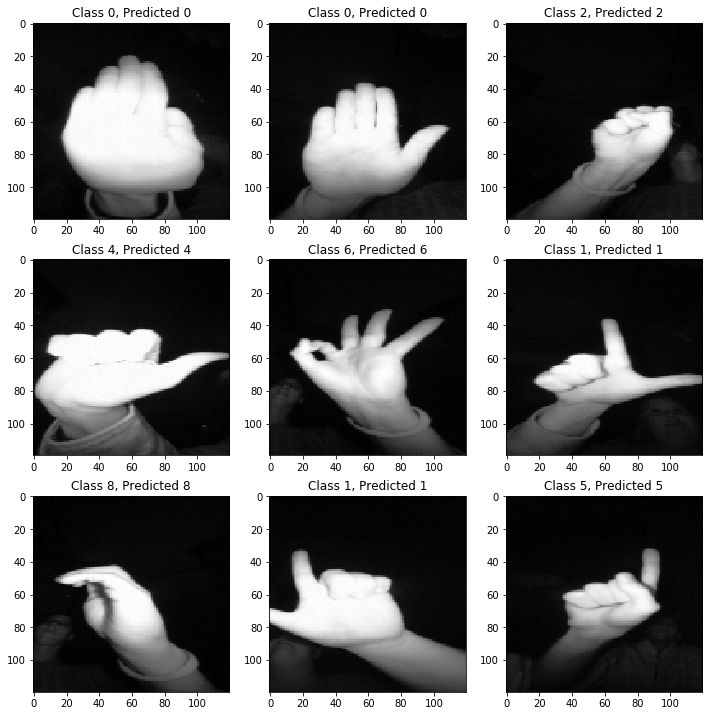

In [20]:
correct = np.where(predicted==test_labels)[0]
predicted_classes = np.argmax(np.round(prediction),axis=1)

show_correct_labels(correct, predicted_classes, test_data, test_labels)

Found 393 incorrect labels


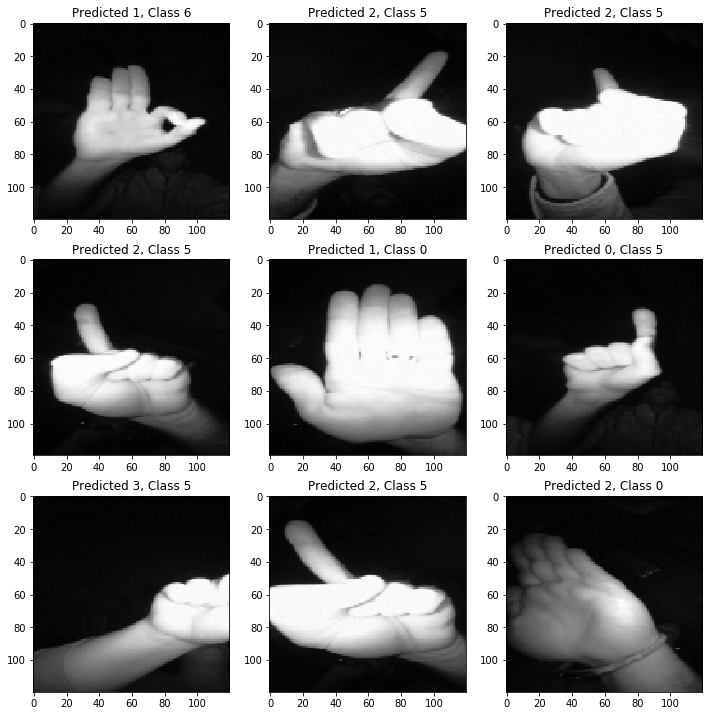

In [21]:
incorrect = np.where(predicted_classes!=test_labels)[0]
show_incorrect_labels(incorrect, predicted_classes, test_data, test_labels)

In [22]:
confusion_matrix = metrics.confusion_matrix(y_true=test_labels, y_pred=predicted_classes)

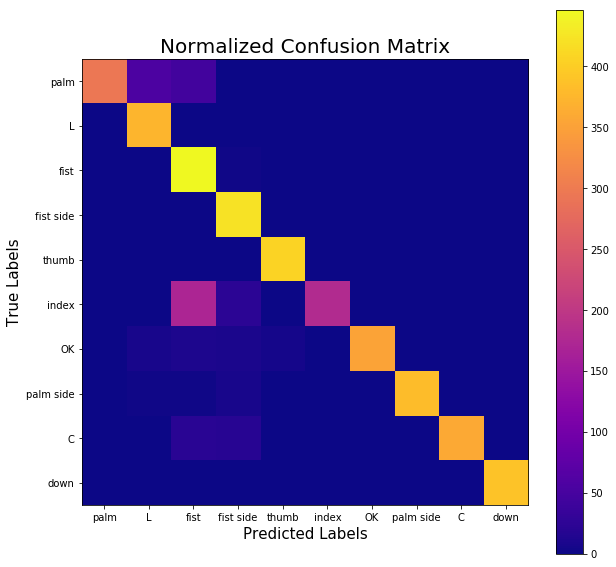

In [23]:
classes = {0: 'palm', 1: 'L', 2: 'fist', 3: 'fist side', 4: 'thumb', 5: 'index', 6: 'OK', \
           7: 'palm side', 8: 'C', 9: 'down'}
plot_conf_matrix(classes, confusion_matrix)

### Classification Report

In [24]:
target_names = list(classes.values())
print(classification_report(test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

        palm       1.00      0.74      0.85       399
           L       0.85      1.00      0.92       374
        fist       0.64      1.00      0.78       448
   fist side       0.87      1.00      0.93       423
       thumb       0.99      1.00      0.99       406
       index       1.00      0.48      0.65       376
          OK       1.00      0.91      0.95       387
   palm side       1.00      0.97      0.98       395
           C       1.00      0.90      0.94       402
        down       1.00      1.00      1.00       390

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.93      0.90      0.90      4000
weighted avg       0.93      0.90      0.90      4000

